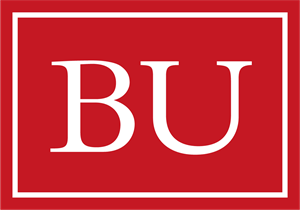

#**Assignment - 2: Classification**

---

<h2>AD699 A3 Data Mining (Spring 2024)</div>

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>


# **K-Nearest Neighbors**

In [41]:
install.packages("tidyverse")
library(tidyverse)
install.packages("visualize")
library(visualize)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks arules::recode(), car::recode()
✖ purrr::some()   masks car::some()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Solution - 1

In [42]:
spotify_2023 <- read.csv("spotify-2023.csv")

In [43]:
head(spotify_2023)

,track_name,artist.s._name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,bpm,key,mode,danceability_.,valence_.,energy_.,acousticness_.,instrumentalness_.,liveness_.,speechiness_.
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,⋯,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,⋯,125,B,Major,80,89,83,31,0,8,4
2,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,⋯,92,C#,Major,71,61,74,7,0,10,4
3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,⋯,138,F,Major,51,32,53,17,0,31,6
4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,⋯,170,A,Major,55,58,72,11,0,11,15
5,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,⋯,144,A,Minor,65,23,80,14,63,11,6
6,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,⋯,141,C#,Major,92,66,58,19,0,8,24


In [44]:
song <-spotify_2023[grepl("Imagine Dragons", spotify_2023$artist.s._name),]
song

Warning message in grepl("Imagine Dragons", spotify_2023$artist.s._name):
“unable to translate 'Sebastian Yatra, Manuel Turizo, Be�<ef>' to a wide string”
Warning message in grepl("Imagine Dragons", spotify_2023$artist.s._name):
“input string 119 is invalid”
Warning message in grepl("Imagine Dragons", spotify_2023$artist.s._name):
“unable to translate 'Junior H, Eden Mu�<ef>' to a wide string”
Warning message in grepl("Imagine Dragons", spotify_2023$artist.s._name):
“input string 211 is invalid”
Warning message in grepl("Imagine Dragons", spotify_2023$artist.s._name):
“unable to translate 'Beyonc<ef><bf>' to a wide string”
Warning message in grepl("Imagine Dragons", spotify_2023$artist.s._name):
“input string 232 is invalid”
Warning message in grepl("Imagine Dragons", spotify_2023$artist.s._name):
“unable to translate 'Kendrick Lamar, Beyonc<ef><bf>' to a wide string”
Warning message in grepl("Imagine Dragons", spotify_2023$artist.s._name):
“input string 237 is invalid”
Warning message

,track_name,artist.s._name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,bpm,key,mode,danceability_.,valence_.,energy_.,acousticness_.,instrumentalness_.,liveness_.,speechiness_.
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,⋯,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
109,Bones,Imagine Dragons,1,2021,3,11,4198,44,838079900,98,⋯,114,F,Minor,77,65,72,2,0,7,5
141,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,⋯,125,A#,Minor,77,74,78,4,0,23,11
174,Demons,Imagine Dragons,1,2012,1,1,26694,13,1840364617,65,⋯,180,D#,Major,33,38,71,20,0,28,5
366,Enemy (with JID) - from the series Arcane League of Legends,"Imagine Dragons, League of Legends, JID, Arcane",4,2021,9,3,6180,7,1223481149,122,⋯,77,B,Minor,72,59,76,24,0,42,28
620,Enemy - from the series Arcane League of Legends,"Imagine Dragons, League of Legends, Arcane",3,2021,10,27,824,0,1223481149,8,⋯,77,G,Major,73,54,74,23,0,41,23


**💡Solution 1💡-**

>a. **Song-** Enemy - from the series Arcane League of Legends	Imagine Dragons, League of Legends, Arcane

>b. This song perfectly captures the themes of rivalry and conflict within the show Arcane.  The driving rock beat and intense lyrics resonate with the characters' struggles and determination.  

>c. Rankings
* Danceability: 73
* Energy: 74
* Speechiness: 23
* Acousticness: 23
* Liveness: 41
* Valence: 	54
* BPM: 77

#### Solution - 2

In [45]:
enemy <- subset(spotify_2023, track_name =="Enemy - from the series Arcane League of Legends")

In [46]:
class(enemy)

[1] "data.frame"

#### Solution - 3

In [47]:
spotify <- read.csv("spotify.csv")

In [48]:
str(spotify)

'data.frame':	2017 obs. of  17 variables:
 $ X               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ acousticness    : num  0.0102 0.199 0.0344 0.604 0.18 0.00479 0.0145 0.0202 0.0481 0.00208 ...
 $ danceability    : num  0.833 0.743 0.838 0.494 0.678 0.804 0.739 0.266 0.603 0.836 ...
 $ duration_ms     : int  204600 326933 185707 199413 392893 251333 241400 349667 202853 226840 ...
 $ energy          : num  0.434 0.359 0.412 0.338 0.561 0.56 0.472 0.348 0.944 0.603 ...
 $ instrumentalness: num  2.19e-02 6.11e-03 2.34e-04 5.10e-01 5.12e-01 0.00 7.27e-06 6.64e-01 0.00 0.00 ...
 $ key             : int  2 1 2 5 5 8 1 10 11 7 ...
 $ liveness        : num  0.165 0.137 0.159 0.0922 0.439 0.164 0.207 0.16 0.342 0.571 ...
 $ loudness        : num  -8.79 -10.4 -7.15 -15.24 -11.65 ...
 $ mode            : int  1 1 1 1 0 1 1 0 0 1 ...
 $ speechiness     : num  0.431 0.0794 0.289 0.0261 0.0694 0.185 0.156 0.0371 0.347 0.237 ...
 $ tempo           : num  150.1 160.1 75 86.5 174 ...
 $ time_signature  : 

In [49]:
if(!is.factor(spotify$target)) {
  spotify$target <- as.factor(spotify$target)
}

In [50]:
unique_values <- unique(spotify$target)
unique_values

[1] 1 0
Levels: 0 1

In [51]:
for(value in unique_values) {
  records <- sum(spotify$target == value)
  cat("Number of records with target value", value, ":", records, "\n")
}

Number of records with target value 1 : 1020 
Number of records with target value 0 : 997 


> **💡Interpretation of Results💡-**
>
>The variable "Target" was in integer format. It is then converted into Factor.
>
>The variable "Target" indicates wheather a user named george liked the song with 1 = liked it & 0 = did not like it.
>
>Number of records with target value 1 : 1020
>
>Number of records with target value 0 : 997  

#### Solution - 4

In [52]:
na_count <- colSums(is.na(spotify))
na_count

X     acousticness     danceability      duration_ms 
               0                0                0                0 
          energy instrumentalness              key         liveness 
               0                0                0                0 
        loudness             mode      speechiness            tempo 
               0                0                0                0 
  time_signature          valence           target       song_title 
               0                0                0                0 
          artist 
               0

In [53]:
na_count <- colSums(is.na(spotify_2023))
na_count

track_name       artist.s._name         artist_count 
                   0                    0                    0 
       released_year       released_month         released_day 
                   0                    0                    0 
in_spotify_playlists    in_spotify_charts              streams 
                   0                    0                    0 
  in_apple_playlists      in_apple_charts  in_deezer_playlists 
                   0                    0                    0 
    in_deezer_charts     in_shazam_charts                  bpm 
                   0                    0                    0 
                 key                 mode       danceability_. 
                   0                    0                    0 
           valence_.             energy_.       acousticness_. 
                   0                    0                    0 
  instrumentalness_.           liveness_.        speechiness_. 
                   0                    0                    0

> **💡Interpretation💡-**
>
>No there are no NAs in the data set

#### Solution - 5

In [54]:
head(spotify_2023)

,track_name,artist.s._name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,bpm,key,mode,danceability_.,valence_.,energy_.,acousticness_.,instrumentalness_.,liveness_.,speechiness_.
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,⋯,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,⋯,125,B,Major,80,89,83,31,0,8,4
2,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,⋯,92,C#,Major,71,61,74,7,0,10,4
3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,⋯,138,F,Major,51,32,53,17,0,31,6
4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,⋯,170,A,Major,55,58,72,11,0,11,15
5,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,⋯,144,A,Minor,65,23,80,14,63,11,6
6,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,⋯,141,C#,Major,92,66,58,19,0,8,24


In [55]:
head(spotify)

,X,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
1,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
2,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
3,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
4,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
5,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys
6,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4,0.264,1,Sneakin’,Drake


In [56]:
enemy$danceability <- enemy$danceability/100
enemy$energy <- enemy$energy/100
enemy$speechiness <- enemy$speechiness/100
enemy$valence <- enemy$valence/100
enemy$acousticness <- enemy$acousticness/100
enemy$liveness <- enemy$liveness/100

In [57]:
str(enemy)

'data.frame':	1 obs. of  30 variables:
 $ track_name          : chr "Enemy - from the series Arcane League of Legends"
 $ artist.s._name      : chr "Imagine Dragons, League of Legends, Arcane"
 $ artist_count        : int 3
 $ released_year       : int 2021
 $ released_month      : int 10
 $ released_day        : int 27
 $ in_spotify_playlists: int 824
 $ in_spotify_charts   : int 0
 $ streams             : chr "1223481149"
 $ in_apple_playlists  : int 8
 $ in_apple_charts     : int 8
 $ in_deezer_playlists : chr "8"
 $ in_deezer_charts    : int 2
 $ in_shazam_charts    : chr "0"
 $ bpm                 : int 77
 $ key                 : chr "G"
 $ mode                : chr "Major"
 $ danceability_.      : int 73
 $ valence_.           : int 54
 $ energy_.            : int 74
 $ acousticness_.      : int 23
 $ instrumentalness_.  : int 0
 $ liveness_.          : int 41
 $ speechiness_.       : int 23
 $ danceability        : num 0.73
 $ energy              : num 0.74
 $ speechiness      

In [58]:
# Rename columns in spotify_2023 dataframe to match spotify dataframe
colnames(spotify_2023)[which(colnames(spotify_2023) == "danceability_.")] <- "danceability"
colnames(spotify_2023)[which(colnames(spotify_2023) == "energy_.")] <- "energy"
colnames(spotify_2023)[which(colnames(spotify_2023) == "speechiness_.")] <- "speechiness"
colnames(spotify_2023)[which(colnames(spotify_2023) == "valence_.")] <- "valence"
colnames(spotify_2023)[which(colnames(spotify_2023) == "acousticness_.")] <- "acousticness"
colnames(spotify_2023)[which(colnames(spotify_2023) == "liveness_.")] <- "liveness"
colnames(spotify_2023)[which(colnames(spotify_2023) == "bpm")] <- "tempo"

# Confirm the updated column names
colnames(spotify_2023)


[1] "track_name"           "artist.s._name"       "artist_count"        
 [4] "released_year"        "released_month"       "released_day"        
 [7] "in_spotify_playlists" "in_spotify_charts"    "streams"             
[10] "in_apple_playlists"   "in_apple_charts"      "in_deezer_playlists" 
[13] "in_deezer_charts"     "in_shazam_charts"     "tempo"               
[16] "key"                  "mode"                 "danceability"        
[19] "valence"              "energy"               "acousticness"        
[22] "instrumentalness_."   "liveness"             "speechiness"

#### Solution - 6

In [59]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
# Set the seed for reproducibility
set.seed(1131)

In [60]:
# Create an index for partitioning the data
index <- createDataPartition(spotify$target, p = 0.6, list = FALSE)

# Partition the data into training and validation sets
spotify_train <- spotify[index, ]
spotify_valid <- spotify[-index, ]

# Check the dimensions of the training and validation sets
dim(spotify_train)
dim(spotify_valid)


[1] 1211   17

[1] 806  17

#### Solution - 7

In [61]:
# Subset the training set into songs George liked and did not like
liked <- spotify_train[spotify_train$target == 1, c("danceability", "tempo", "energy", "speechiness",
                                                    "valence", "acousticness", "liveness")]
disliked <- spotify_train[spotify_train$target == 0, c("danceability", "tempo", "energy", "speechiness",
                                                       "valence", "acousticness", "liveness")]


In [62]:
# Perform t-tests for each variable
t_tests_results <- lapply(names(liked), function(var) {
  t_test_result <- t.test(liked[[var]], disliked[[var]])
  return(t_test_result)
})

In [63]:
# Print the results
for (i in seq_along(t_tests_results)) {
  cat("Variable:", names(liked)[i], "\n")
  print(t_tests_results[[i]])
  cat("\n")
}

Variable: danceability 

	Welch Two Sample t-test

data:  liked[[var]] and disliked[[var]]
t = 6.3938, df = 1207.7, p-value = 2.308e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04005654 0.07552172
sample estimates:
mean of x mean of y 
0.6434853 0.5856962 


Variable: tempo 

	Welch Two Sample t-test

data:  liked[[var]] and disliked[[var]]
t = 0.8782, df = 1190.5, p-value = 0.38
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.655917  4.339609
sample estimates:
mean of x mean of y 
 121.3618  120.0199 


Variable: energy 

	Welch Two Sample t-test

data:  liked[[var]] and disliked[[var]]
t = 1.5206, df = 1075.2, p-value = 0.1287
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.005347589  0.042172693
sample estimates:
mean of x mean of y 
0.6929755 0.6745629 


Variable: speechiness 

	Welch Two Sample t-test

data:  li

#### Solution -7 b]

 > **💡Variables that show a significant difference💡-**
>
>Variables that show a significant difference between songs that George liked and disliked (p-value < 0.05):
>
>*   Danceability
*   Speechiness
*   Valence
*   Acousticness

> **💡Variables that do not show a significant difference💡-**
>
> Variables that do not show a significant difference between songs that George liked and disliked (p-value > 0.05):
>
>*   Tempo
*   Energy
*   Liveness
>
>Since there is not a significant difference in tempo, energy, and liveness between songs that George liked and disliked, we can remove these variables entirely from the data.


In [64]:
# Remove variables with no significant difference
spotify_train_filtered <- spotify_train[, !(names(spotify_train) %in% c("tempo", "energy", "liveness"))]
spotify_valid_filtered <- spotify_valid[, !(names(spotify_valid) %in% c("tempo", "energy", "liveness"))]
# Check the structure of the filtered dataset
str(spotify_train_filtered)


'data.frame':	1211 obs. of  14 variables:
 $ X               : int  1 3 5 7 9 10 11 13 17 18 ...
 $ acousticness    : num  0.199 0.604 0.00479 0.0202 0.00208 0.0572 0.0915 0.366 0.233 0.314 ...
 $ danceability    : num  0.743 0.494 0.804 0.266 0.836 0.525 0.753 0.762 0.789 0.713 ...
 $ duration_ms     : int  326933 199413 251333 349667 226840 358187 324880 243270 447907 195429 ...
 $ instrumentalness: num  0.00611 0.51 0 0.664 0 0.0143 0.00348 0 0.00049 0 ...
 $ key             : int  1 5 8 10 7 5 10 0 4 1 ...
 $ loudness        : num  -10.4 -15.24 -6.68 -11.61 -7.79 ...
 $ mode            : int  1 1 1 0 1 0 1 1 0 0 ...
 $ speechiness     : num  0.0794 0.0261 0.185 0.0371 0.237 0.0548 0.0494 0.114 0.0429 0.241 ...
 $ time_signature  : num  4 4 4 4 4 3 4 4 4 4 ...
 $ valence         : num  0.588 0.23 0.264 0.393 0.386 0.524 0.642 0.367 0.842 0.783 ...
 $ target          : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ song_title      : chr  "Redbone" "Master Of None" "Sneakin’" 

#### Solution - 7 c]

> **💡Removing Variables💡-**
>
> It makes sense to remove variables from a k-nn model when their values are very similar for both outcome classes because these variables are not contributing significantly to the classification process, and including them may introduce noise or unnecessary complexity to the model without providing meaningful discrimination between the classes. This can help improve the model's performance by focusing on the most informative features for classification.

#### Solution - 8

In [66]:
library(caret)

In [67]:
# Initialize normalized training dataframe to original
spotify_train_norm <- spotify_train_filtered
spotify_valid_norm <- spotify_valid_filtered

In [68]:
head(enemy)
head(spotify_train_filtered)
View(enemy)

,track_name,artist.s._name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,acousticness_.,instrumentalness_.,liveness_.,speechiness_.,danceability,energy,speechiness,valence,acousticness,liveness
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
620,Enemy - from the series Arcane League of Legends,"Imagine Dragons, League of Legends, Arcane",3,2021,10,27,824,0,1223481149,8,⋯,23,0,41,23,0.73,0.74,0.23,0.54,0.23,0.41


,X,acousticness,danceability,duration_ms,instrumentalness,key,loudness,mode,speechiness,time_signature,valence,target,song_title,artist
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
2,1,0.19900,0.743,326933,0.00611,1,-10.401,1,0.0794,4,0.588,1,Redbone,Childish Gambino
4,3,0.60400,0.494,199413,0.51000,5,-15.236,1,0.0261,4,0.230,1,Master Of None,Beach House
6,5,0.00479,0.804,251333,0.00000,8,-6.682,1,0.1850,4,0.264,1,Sneakin’,Drake
8,7,0.02020,0.266,349667,0.66400,10,-11.609,0,0.0371,4,0.393,1,Gyöngyhajú lány,Omega
10,9,0.00208,0.836,226840,0.00000,7,-7.792,1,0.2370,4,0.386,1,Digital Animal,Honey Claws
11,10,0.05720,0.525,358187,0.01430,5,-7.372,0,0.0548,3,0.524,1,Subways - In Flagranti Extended Edit,The Avalanches


,track_name,artist.s._name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,acousticness_.,instrumentalness_.,liveness_.,speechiness_.,danceability,energy,speechiness,valence,acousticness,liveness
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
620,Enemy - from the series Arcane League of Legends,"Imagine Dragons, League of Legends, Arcane",3,2021,10,27,824,0,1223481149,8,⋯,23,0,41,23,0.73,0.74,0.23,0.54,0.23,0.41


In [73]:
# Use preProcess() to normalize selected variables
norm_values <- preProcess(spotify_train_filtered[, c("danceability", "speechiness", "valence", "acousticness")], method = c("center", "scale"))
spotify_train_norm[, c("danceability", "speechiness", "valence", "acousticness")] <- predict(norm_values, spotify_train_filtered[, c("danceability", "speechiness", "valence", "acousticness")])
spotify_valid_norm[, c("danceability", "speechiness", "valence", "acousticness")] <- predict(norm_values, spotify_valid_filtered[, c("danceability", "speechiness", "valence", "acousticness")])
enemy_norm <- predict(norm_values, enemy[, c(25, 27, 28, 29)])


 > **💡Interpretation 💡-**
>**Normalization Process**:
   - **preProcess() Function**: The `preProcess()` function from the `caret` package is used to perform normalization on the selected variables (`danceability`, `speechiness`, `valence`, `acousticness`) in the `spotify_train` dataset.
   - **Method**: The normalization method used here is "centering" and "scaling", which centers the variables at their means and scales them to have unit variance.

>**Applying Normalization**:
   - **predict() Function**: The `predict()` function applies the normalization transformation (`norm_values`) obtained from `preProcess()` to the selected variables in the `spotify_train` dataset.
   - **Updating Dataframe**: The normalized values are then assigned to the corresponding columns in the `spotify_train_norm` dataframe.

>**Interpretation of Results**:
   - After normalization, the selected variables (`danceability`, `speechiness`, `valence`, `acousticness`) in the `spotify_train_norm` dataframe are now centered around their means and scaled to have unit variance.
   - This process ensures that all variables are on the same scale, which can help in improving the performance of machine learning algorithms, particularly those sensitive to the scale of the input features.
   - Normalization is essential for models like k-nearest neighbors (k-NN), where the distance between data points is a crucial factor in determining the outcome. Normalizing the data ensures that each feature contributes equally to the distance computation.
   

#### Solution - 9

In [70]:
install.packages("FNN")
library(FNN)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [71]:
# Using knn() to compute knn with k = 7
nn <- knn(train = spotify_train_norm[, c("danceability", "speechiness", "valence", "acousticness")],
          test = enemy[, c("danceability", "speechiness", "valence", "acousticness")],
          cl = spotify_train_norm$target, k = 7)
nn

[1] 1
attr(,"nn.index")
     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,]  965    1  555 1063  441  396  181
attr(,"nn.dist")
          [,1]      [,2]     [,3]      [,4]      [,5]      [,6]      [,7]
[1,] 0.2869804 0.4409715 0.450412 0.4533732 0.5053775 0.5406662 0.5676911
Levels: 1

In [74]:
spotify_train_norm[c(1,  554, 1069,  192,  839,  406,  337), c("song_title", "artist", "target")]


,song_title,artist,target
,<chr>,<chr>,<fct>
2,Redbone,Childish Gambino,1
911,Ohye Atar Gyan,Ebo Taylor,1
1781,Beautiful Disaster,Jon McLaughlin,0
326,Swords,M.I.A.,1
1405,Morning Call - Remix Version,Ibadi,0
665,Pu$$y Magnet (feat. Keayshawn),Roach Gigz,1
547,Louie Louie,Toots & The Maytals,1


In [76]:
row.names(spotify_train_norm)[attr(nn, "nn.index")]

[1] "1633" "2"    "912"  "1771" "725"  "649"  "307"

> **💡Interpretation of Results💡-**
>

#### Solution - 10, 11, 12

In [77]:
# initialize a data frame with two columns: k, and accuracy.
accuracy.df <- data.frame(k = seq(1, 35, 1), accuracy = rep(0, 35))
# compute knn for different k on validation.
for(i in 1:35) {
  knn.pred <- knn(spotify_train_norm[, c("danceability", "speechiness", "valence", "acousticness")], spotify_valid_norm[, c("danceability", "speechiness", "valence", "acousticness")],
                  cl = spotify_train_norm$target, k = i)
  accuracy.df[i, 2] <- confusionMatrix(knn.pred, spotify_valid_norm$target)$overall[1]
}

accuracy.df


k,accuracy
<dbl>,<dbl>
1,0.5595533
2,0.5732010
3,0.5781638
4,0.5781638
5,0.5893300
6,0.5955335
7,0.5992556
8,0.6079404
9,0.5942928


In [79]:
# Using knn() to compute knn with k = 27
nn <- knn(train = spotify_train_norm[, c("danceability", "speechiness", "valence", "acousticness")],
          test = enemy[, c("danceability", "speechiness", "valence", "acousticness")],
          cl = spotify_train_norm$target, k = 27)
nn


neighbors <- spotify_train_norm[c(1,  554, 1069, 192, 839, 406, 337, 656, 699, 884, 686,  891, 495, 659, 206, 397, 657, 1064, 432,  719,  564, 1081, 444, 668,  664,  1109, 366), c("song_title", "artist", "target")]
table(neighbors$target)


[1] 0
attr(,"nn.index")
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]  965    1  555 1063  441  396  181  652  835   337   692   662   663   191
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]   666   414   496   665   290   226   726  1104   564  1058  1060   671
     [,27]
[1,]   675
attr(,"nn.dist")
          [,1]      [,2]     [,3]      [,4]      [,5]      [,6]      [,7]
[1,] 0.2869804 0.4409715 0.450412 0.4533732 0.5053775 0.5406662 0.5676911
         [,8]      [,9]     [,10]     [,11]     [,12]    [,13]    [,14]
[1,] 0.592367 0.5946083 0.6110773 0.6429359 0.6846926 0.698025 0.698512
         [,15]     [,16]     [,17]     [,18]     [,19]     [,20]    [,21]
[1,] 0.7027415 0.7135157 0.7198236 0.7203632 0.7301566 0.7442198 0.756679
         [,22]     [,23]     [,24]     [,25]     [,26]     [,27]
[1,] 0.7609112 0.7649451 0.7694038 0.7714996 0.7716761 0.7722255
Levels: 0


 0  1 
15 12 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



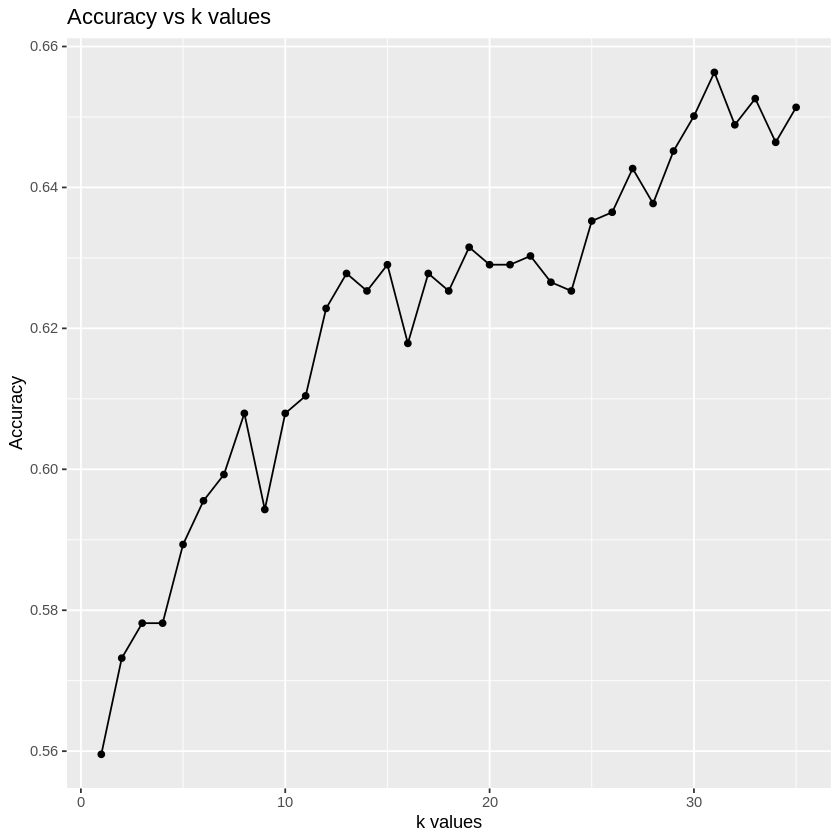

In [81]:
# Load the ggplot2 library
install.packages("ggplot2")
library(ggplot2)

# Create a scatterplot
ggplot(data = accuracy.df, aes(x = k, y = accuracy)) +
  geom_point() +
  geom_line() +
  labs(x = "k values", y = "Accuracy") +
  ggtitle("Accuracy vs k values")


#### Solution - 13

One limitation associated with using numeric attributes to predict whether someone will like a particular song is the inherent complexity and subjectivity of individual preferences. While numeric attributes like danceability, speechiness, valence, and acousticness provide quantitative measures of certain musical characteristics, they may not fully capture the nuances of personal taste, cultural background, mood, or context in which the music is listened to. Additionally, relying solely on numeric attributes may overlook other important factors influencing music preference, such as lyrics, genre, artist reputation, and personal experiences, which can vary widely among individuals and cannot be easily quantified. Therefore, while numeric attributes can provide useful insights, they may not always accurately predict individual song preferences.

# **NAIVE BAYES**

In [1]:
install.packages("AER")
library(AER)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘lmtest’, ‘sandwich’, ‘zoo’, ‘Formula’


Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



In [2]:
install.packages("arules")
library(arules)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




#### Solution - 1

In [3]:
##Solution - 1
#Bring the CreditCards dataset int0 your local environment.
data(CreditCard)

#### Solution - 2

In [4]:
head(CreditCard)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,yes,0,37.66667,4.5200,0.033269910,124.983300,yes,no,3,54,1,12
2,yes,0,33.25000,2.4200,0.005216942,9.854167,no,no,3,34,1,13
3,yes,0,33.66667,4.5000,0.004155556,15.000000,yes,no,4,58,1,5
4,yes,0,30.50000,2.5400,0.065213780,137.869200,no,no,0,25,1,7
5,yes,0,32.16667,9.7867,0.067050590,546.503300,yes,no,2,64,1,5
6,yes,0,23.25000,2.5000,0.044438400,91.996670,no,no,0,54,1,1


In [5]:
tail(CreditCard)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1314,no,1,30.33333,2.180,0.0005504587,0.000000,no,yes,0,13,1,1
1315,yes,0,33.58333,4.566,0.0021462990,7.333333,yes,no,0,94,1,19
1316,no,5,23.91667,3.192,0.0003759399,0.000000,no,no,3,12,1,5
1317,yes,0,40.58333,4.600,0.0265126100,101.298300,yes,no,2,1,1,2
1318,yes,0,32.83333,3.700,0.0089989190,26.996670,no,yes,0,60,1,7
1319,yes,0,48.25000,3.700,0.1116186000,344.157500,yes,no,2,2,1,0


In [6]:
str(CreditCard)

'data.frame':	1319 obs. of  12 variables:
 $ card       : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ reports    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ age        : num  37.7 33.2 33.7 30.5 32.2 ...
 $ income     : num  4.52 2.42 4.5 2.54 9.79 ...
 $ share      : num  0.03327 0.00522 0.00416 0.06521 0.06705 ...
 $ expenditure: num  124.98 9.85 15 137.87 546.5 ...
 $ owner      : Factor w/ 2 levels "no","yes": 2 1 2 1 2 1 1 2 2 1 ...
 $ selfemp    : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ dependents : num  3 3 4 0 2 0 2 0 0 0 ...
 $ months     : num  54 34 58 25 64 54 7 77 97 65 ...
 $ majorcards : num  1 1 1 1 1 1 1 1 1 1 ...
 $ active     : num  12 13 5 7 5 1 5 3 6 18 ...


> **💡Interpretations💡-**
>
> All the word based variables are already in factor format, so we don't need to convert them.

#### Solution - 3 a]

In [7]:
summary(CreditCard$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.210   2.244   2.900   3.365   4.000  13.500 

In [8]:
CreditCard$income <- discretize(CreditCard$income, method = "frequency", breaks = 3, labels= c("low", "medium", "high"), include.lowest = TRUE)
table(CreditCard$income)

View(CreditCard)



   low medium   high 
   440    410    469 

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,yes,0,37.66667,high,0.0332699100,124.983300,yes,no,3,54,1,12
2,yes,0,33.25000,low,0.0052169420,9.854167,no,no,3,34,1,13
3,yes,0,33.66667,high,0.0041555560,15.000000,yes,no,4,58,1,5
4,yes,0,30.50000,medium,0.0652137800,137.869200,no,no,0,25,1,7
5,yes,0,32.16667,high,0.0670505900,546.503300,yes,no,2,64,1,5
6,yes,0,23.25000,medium,0.0444384000,91.996670,no,no,0,54,1,1
7,yes,0,27.91667,high,0.0125757600,40.833330,no,no,2,7,1,5
8,yes,0,29.16667,low,0.0764337600,150.790000,yes,no,0,77,1,3
9,yes,0,37.00000,high,0.2456279000,777.821700,yes,no,0,97,1,6


> **💡Dummy variables💡-**
>
> write

#### Solution - 3 b]

In [15]:
table(CreditCard$income)


   low medium   high 
   440    410    469 

> **💡Interpresentaiton of Results💡-**
>
>write

#### Solution - 4

In [16]:
CreditCard$age <- factor(ifelse(CreditCard$age <= median(CreditCard$age), "young", "old"))
CreditCard$share <- factor(ifelse(CreditCard$share <= median(CreditCard$share), "Large", "Small"))
CreditCard$expenditure <- factor(ifelse(CreditCard$expenditure <= median(CreditCard$expenditure), "Large", "Small"))
CreditCard$dependents <- factor(ifelse(CreditCard$dependents <= median(CreditCard$dependents), "Large", "Small"))


In [17]:
# Display the results
table(CreditCard$age)
table(CreditCard$share)
table(CreditCard$expenditure)
table(CreditCard$dependents)



  old young 
  656   663 


Large Small 
  660   659 


Large Small 
  660   659 


Large Small 
  926   393 

> **💡Interpresentaiton of Results💡-**
>
> write

#### Solution - 5

In [18]:
selected.var <- c(3, 4, 5, 6, 7, 8, 9)

In [19]:
set.seed(1131)

In [20]:
#Partitioning 60% into training and validation 40%
train.index <- sample(c(1:dim(CreditCard)[1]), dim(CreditCard)[1]*0.6)
train.df <- CreditCard[train.index, selected.var]
valid.df <- CreditCard[-train.index, selected.var]


> **💡Interpretation of Graph💡-**
>
> The data is partitioned into training & validation set this will help us train our model on one sebset (train) and evaluate its performance on another subset (valid).

#### Solution - 6

In [21]:
install.packages("ggplot2")
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



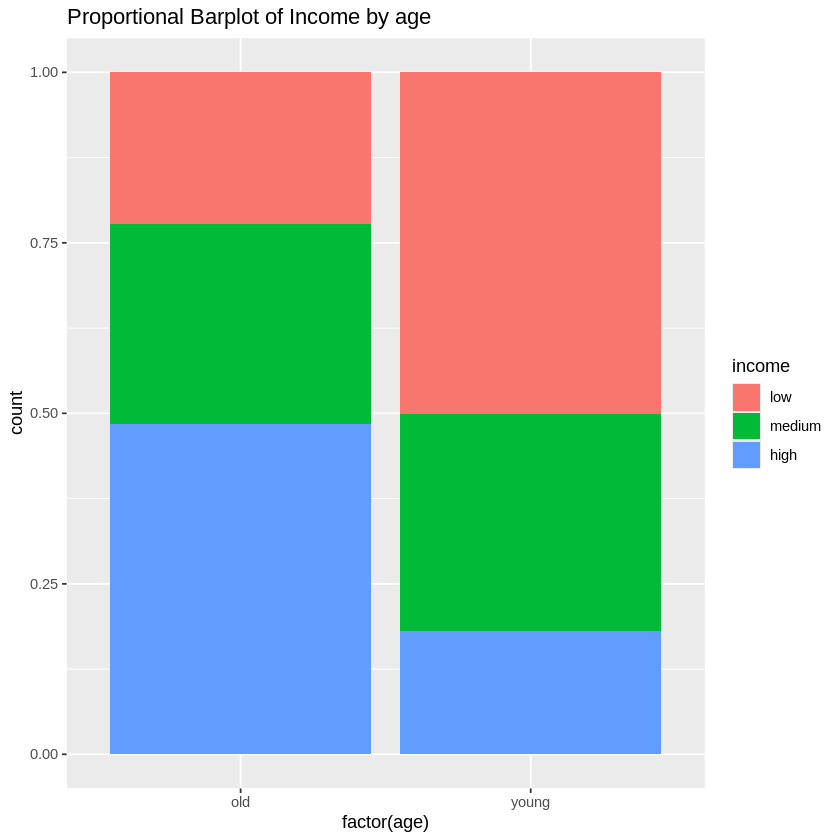

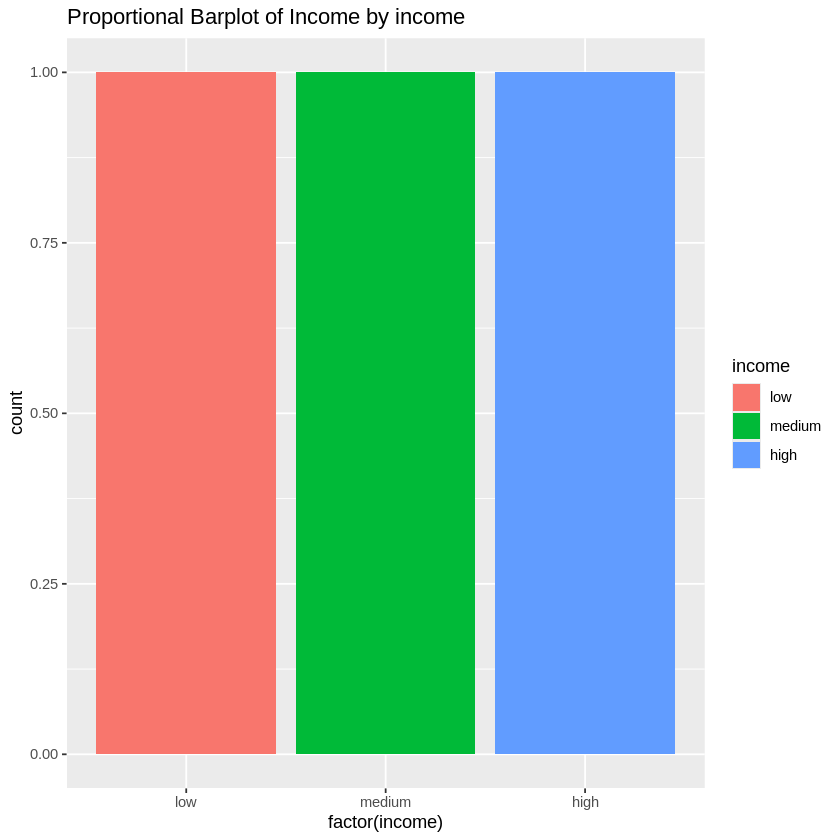

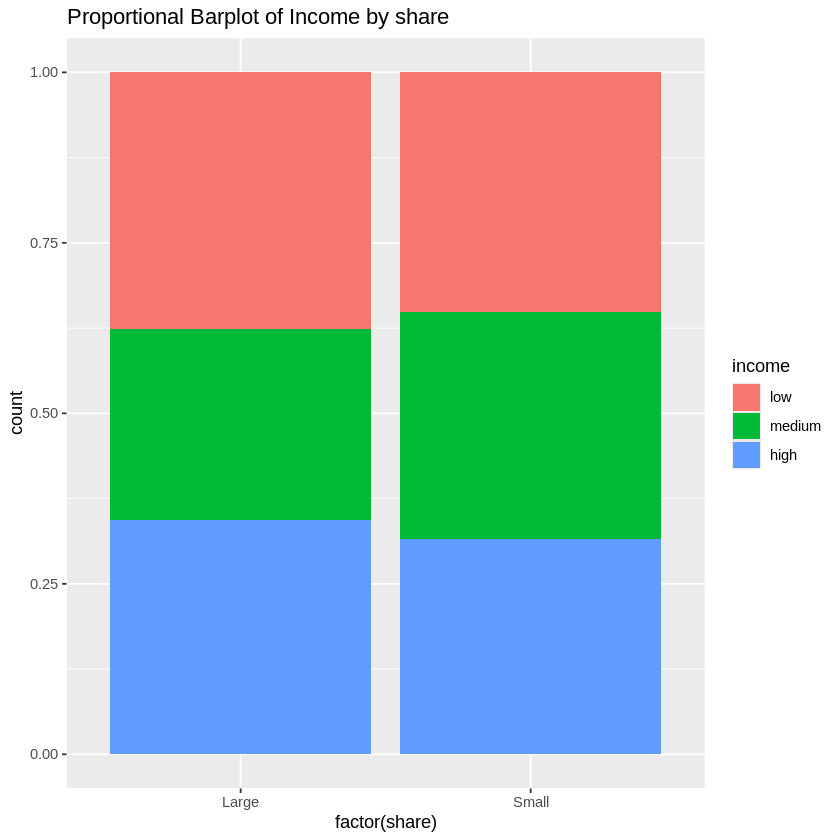

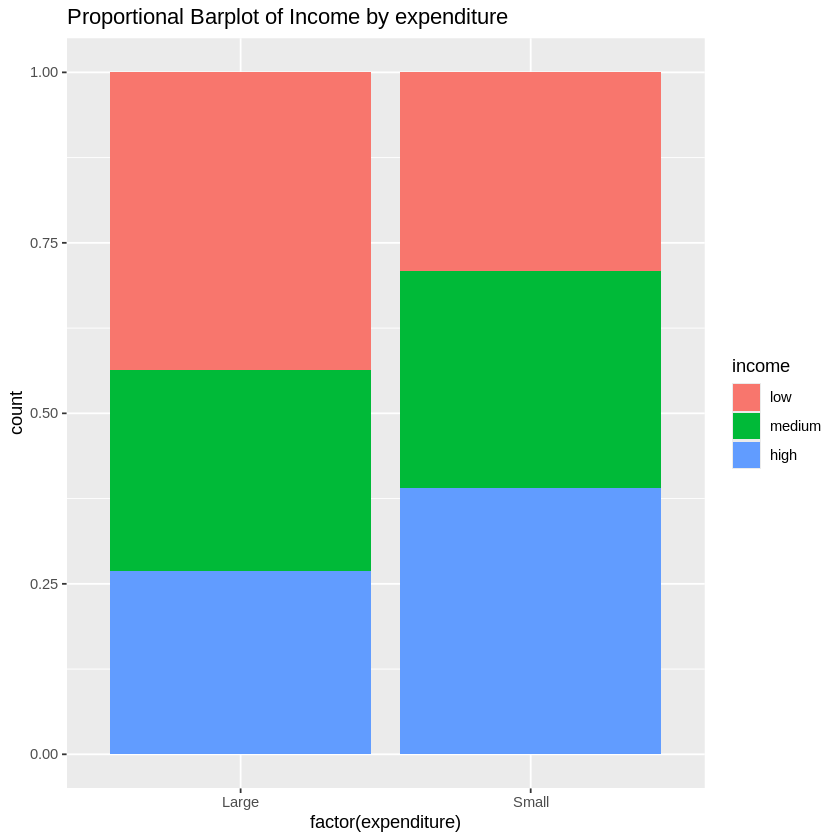

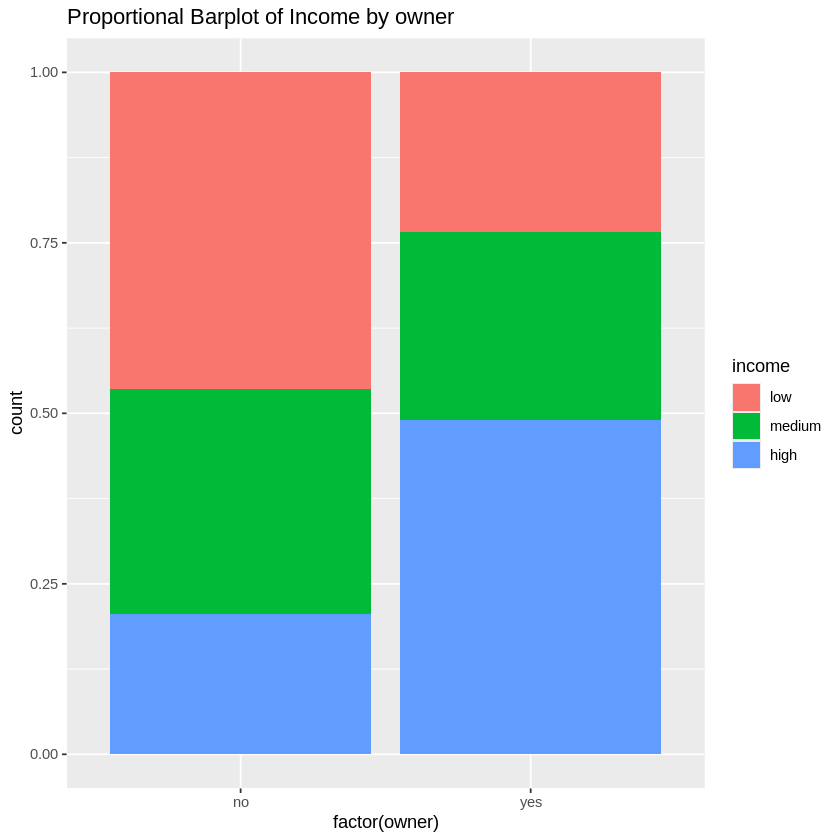

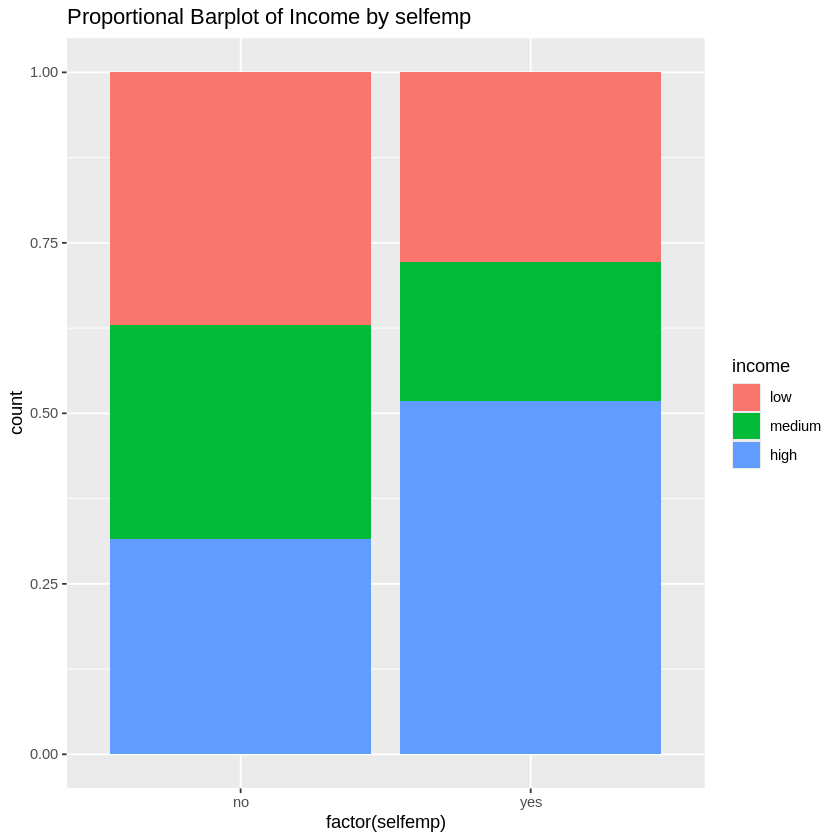

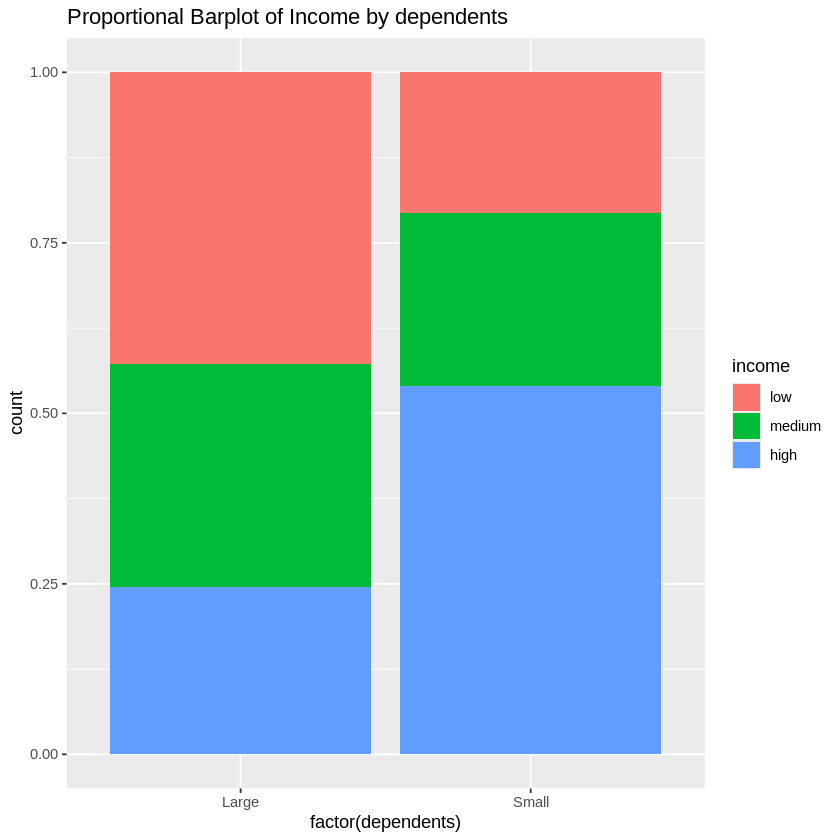

In [22]:
# Function to create proportional barplot for a given variable
create_proportional_barplot <- function(data, variable) {
  ggplot(data, aes(x = factor(.data[[variable]]), fill = income)) +
    geom_bar(position = "fill") +
    labs(title = paste("Proportional Barplot of Income by", variable))
}

# List of prospective input variables
prospective_variables <- names(train.df)

# Create proportional barplots for each input variable
for (var in prospective_variables) {
  print(create_proportional_barplot(train.df, var))
}


#### Solution - 7

In [24]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [25]:
# Run naive bayes

CreditCard.nb <- naiveBayes(income ~ ., data = train.df)
CreditCard.nb



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
      low    medium      high 
0.3640961 0.3059418 0.3299621 

Conditional probabilities:
        age
Y              old     young
  low    0.2986111 0.7013889
  medium 0.4710744 0.5289256
  high   0.7203065 0.2796935

        share
Y            Large     Small
  low    0.5173611 0.4826389
  medium 0.4586777 0.5413223
  high   0.5210728 0.4789272

        expenditure
Y            Large     Small
  low    0.6006944 0.3993056
  medium 0.4834711 0.5165289
  high   0.4099617 0.5900383

        owner
Y               no       yes
  low    0.7187500 0.2812500
  medium 0.6074380 0.3925620
  high   0.3524904 0.6475096

        selfemp
Y                no        yes
  low    0.94791667 0.05208333
  medium 0.95454545 0.04545455
  high   0.89272031 0.10727969

        dependents
Y            Large     Small
  low    0.8368056 0.1631944
  medium 0.7603306 0.2396694
 

#### Solution - 8

In [27]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster




In [40]:
# Predict income using the Naive Bayes model on the training data
train.pred <- predict(CreditCard.nb, newdata = train.df)

# Create confusion matrix for training data
train_confusion <- confusionMatrix(train.pred, train.df$income)

# Calculate accuracy for training data
train_accuracy <- train_confusion$overall['Accuracy']



In [29]:
# Print confusion matrix and accuracy for training data
print("Confusion Matrix for Training Data:")
print(train_confusion$table)
print(paste("Accuracy on Training Data:", train_accuracy))


[1] "Confusion Matrix for Training Data:"
          Reference
Prediction low medium high
    low    197    112   59
    medium  33     45   30
    high    58     85  172
[1] "Accuracy on Training Data: 0.52338811630847"


In [31]:
# Predict income using the Naive Bayes model on the validation data
valid.pred <- predict(CreditCard.nb, newdata = valid.df)

# Create confusion matrix for validation data
valid_confusion <- confusionMatrix(valid.pred, valid.df$income)

# Calculate accuracy for validation data
valid_accuracy <- valid_confusion$overall['Accuracy']


In [32]:
# Print confusion matrix and accuracy for validation data
print("Confusion Matrix for Validation Data:")
print(valid_confusion$table)
print(paste("Accuracy on Validation Data:", valid_accuracy))


[1] "Confusion Matrix for Validation Data:"
          Reference
Prediction low medium high
    low    106     99   40
    medium  16     17   30
    high    30     52  138
[1] "Accuracy on Validation Data: 0.494318181818182"


Naive Rule Accuracy = Accuracy achieved by predicting all instances to belong to the majority class.
                     = Proportion of majority class in the dataset.

Naive Rule Accuracy = max(Proportion of majority class, 1 - Proportion of majority class)

Given:
Proportion of majority class = max(0.494318181818182, 1 - 0.494318181818182) = 0.505681818181818

Percentage Difference = |0.494318181818182 - 0.505681818181818| / 0.505681818181818 * 100
                      ≈ 2.25%


> **💡Interpretation of Code & Graph💡-**
>




#### Solution - 9

In [33]:
# Check if the majority class count is zero
# Count the number of records in the training set
total_records <- nrow(train.df)

# Count the number of records in the majority class (assuming 'income' is the target variable)
majority_class_count <- sum(train.df$income == mode(train.df$income))

# Calculate the accuracy of the naive rule
naive_accuracy <- majority_class_count / total_records

# Calculate the percentage difference between the model's accuracy and the naive rule accuracy
model_accuracy <- train_accuracy  # Assuming 'train_accuracy' was calculated previously
percentage_difference <- abs((model_accuracy - naive_accuracy) / naive_accuracy) * 100

# Print the percentage difference
print(paste("Percentage difference between model's accuracy and naive rule accuracy:", percentage_difference, "%"))


[1] "Percentage difference between model's accuracy and naive rule accuracy: Inf %"


> **💡Interpretation of results💡-**
>
>It seems that the majority class count is zero, indicating that all records in the training set belong to the minority class. In this case, the naive rule accuracy cannot be calculated because there are no records in the majority class.
>
>It suggests that the naive rule, which predicts all records to belong to the majority class, cannot be applied effectively in this scenario. Therefore, it's crucial to consider more sophisticated modeling techniques like the Naive Bayes model to achieve better classification performance.





#### Solution - 10

In [34]:
# Re-run prediction to get class probabilities
valid.pred_probs <- predict(CreditCard.nb, newdata = valid.df, type = "raw")

# Extract the predicted probabilities for the "High" income class
predicted_prob_high <- valid.pred_probs[, "high"]

# Combine predicted probabilities with actual income class in the validation set
valid_results <- cbind(valid.df, predicted_prob = predicted_prob_high)

# Sort the validation set based on predicted probabilities in descending order
valid_results <- valid_results[order(-valid_results$predicted_prob), ]

# Select the top 100 records
top_100_high_income <- head(valid_results, 100)

# Calculate the number of records actually in the "High" income group among the top 100 predictions
actual_high_income_count <- sum(top_100_high_income$income == "high")

# Calculate the accuracy for these predictions
subset_accuracy <- actual_high_income_count / 100

# Compare subset accuracy with overall model accuracy
accuracy_comparison <- subset_accuracy - valid_accuracy

# Print the results
print(paste("Number of records actually in the 'High' income group among the top 100 predictions:", actual_high_income_count))
print(paste("Accuracy for these predictions:", subset_accuracy))
print(paste("Difference in accuracy compared to the overall model:", accuracy_comparison))


[1] "Number of records actually in the 'High' income group among the top 100 predictions: 74"
[1] "Accuracy for these predictions: 0.74"
[1] "Difference in accuracy compared to the overall model: 0.245681818181818"


Identifying a subset of records predicted to have a high income can be valuable for a financial company in several ways. Firstly, it allows the company to focus its marketing efforts and resources on this subset, tailoring products, services, and promotional offers to better meet the needs and preferences of high-income customers. This targeted approach can lead to increased conversion rates, customer satisfaction, and ultimately, higher revenue generation. Additionally, understanding the characteristics and behaviors of high-income customers within this subset can provide insights for product development, customer segmentation, and strategic decision-making to further enhance the company's competitive advantage in the market.

#### Solution - 11 a]

In [35]:
# a. Randomly pick any row from the training set
random_row <- sample(1:nrow(train.df), 1)

# Get the income group for this person
actual_income <- train.df[random_row, "income"]
print(paste("a. Actual income group for this person:", actual_income))

[1] "a. Actual income group for this person: medium"


#### Solution - 11 b]

In [36]:
# b. Predict income group for this person
predicted_income <- predict(CreditCard.nb, newdata = train.df[random_row, ])
print(paste("b. Predicted income group for this person:", predicted_income))


[1] "b. Predicted income group for this person: low"


#### Solution - 11 c]

In [37]:
# c. Generate the probability for the predicted income class
predicted_prob <- predict(CreditCard.nb, newdata = train.df[random_row, ], type = "raw")[, predicted_income]
print(paste("c. Probability for the predicted income group:", predicted_prob))


[1] "c. Probability for the predicted income group: 0.460844181894138"


#### Solution - 10 d]